# Breast Cancer Analysis Framework - Shading light on the black box

## 1 - Introduction

### 1.1 - Clinical Background
In 2020, it is estimated that cancer lead to 2.3 million new cases and 685,000 deaths.  
By 2040, the burden from breast cancer is predicted to increase to over 3 million new cases and 1 million deaths every year because of population growth and ageing alone. ([Arnold et al. 2022](https://pmc.ncbi.nlm.nih.gov/articles/PMC9465273/))


These numbers underscore the critical need to **enhance diagnostic processes**, in terms of efficiency, quality and rapidity.  
Early and widespread diagnosis is essential to enable timely intervention, and machine learning techniques, working alongside with clinicians, hold significant potential for this life‑saving process.


One major limitation of machine and statistical learning in diagnosis is their **lack of interpretability**.   
Often described as *'black boxes'* these models provide no insight into the decision process that lead to their prediction, which restricts their ability to effectively support clinical decision-making.  
Here, we will try to improve understanding of the machine decision process.

#### 1.2 - The Data : Breast Cancer Wisconsin Diagnostic Dataset
The Breast Cancer Wisconsin (Diagnostic) Dataset is a real clinical dataset derived from digitized images of fine‑needle aspirates of breast masses, where each sample is labeled as benign or malignant and described by 30 numerical features capturing cell‑nuclei shape and texture.  
It can be found at : [Data](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

#### 1.3 - The Pipeline
We will first apply different statistical methods to evaluate **wich features are the most important** and their level of significance for diagnosis. Thanks to the matplotlib python library, we will construct visuals to make those findings easier to grasp.

Given the critical nature of early tumor detection—where **false negatives pose a greater risk than false positives**—our approach will prioritize **maximizing recall** throughout the analysis. (This aspect will be further explored in Part 3.)

#### Limitation (to put at the end)
The original features (radius, texture, concavity, fractal dimension, etc.) come from a very specific image‑analysis pipeline used in the 1990s on fine‑needle aspiration (FNA) cell images.

To reproduce them exactly on new data, you would need a similar acquisition setup and specialized image‑processing code; this is not something you get “out of the box” from a standard library.

## 2 - Data Exploration
#### 2.1 - Dataset Structure
The first step is to load the data as a csv format (comma separated values) which will allow easier and more efficient downstream manipulations.  
Once this is done, a first exploration of the dataset will give a better understanding of the data structure and caracteristics.

In [18]:
import pandas as pd # Data formating and manipulation
import numpy as np # Numerical operations
import matplotlib.pyplot as plt # Visualisation
import seaborn as sns # Advanced Visualisation
from sklearn.preprocessing import StandardScaler # Normalisation


# Load the dataset and print a validaton message
df = pd.read_csv('./Data/breast_cancer.csv')

# Display the first few rows 
print("Dataset loaded successfully. Here are the first few rows :")
df.head()


Dataset loaded successfully. Here are the first few rows :


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
# print parameters names 

params_list = df.columns.tolist()

print("Parameters names :\n")
print(params_list)

Parameters names :

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


We now want to know how 'clean' is the data before pushing forward our exploration as we do not want Null or NaN (Not a Number) values to undermine our analysis.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The data seems to be already cleaned, among the 30 parameters (32 rows but one is for id and another for diagnostic) of our 569 samples, none is non defined.  
Further exploration is required to gain familiarity with the dataset, to do so we will apply df.describe( wich will give us a synthetic statistical analysis of it)

In [21]:
df[df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


#### 2.2 - Deepening understanding with plots

##### 2.2.1 - Diagnostic DIstribution
Now that we understand the structure of the data, let's plot what we will then try to infer : the diagnosis.  


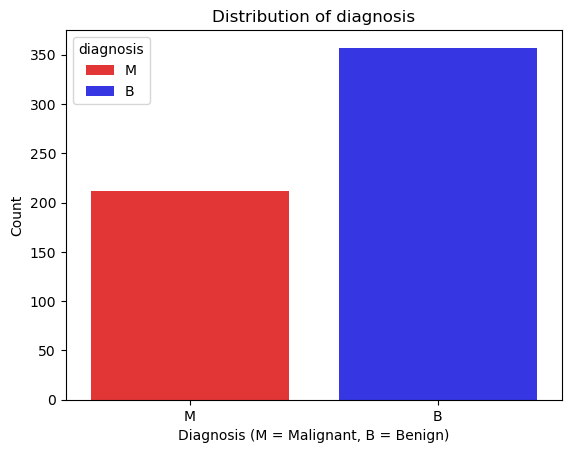

In [22]:
# Plot the distribution of the diagnosis, malignant (red) and benign (blue)
sns.countplot(x='diagnosis', data=df, palette=('red', 'blue'), alpha=0.9, hue='diagnosis', legend=True)
plt.title('Distribution of diagnosis')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Count')
plt.show()

##### 2.2.2 - Features-Diagnostic Relationship
One important aspect is the fact that the benign group is much greater han the malignant one. However, if one wants to maximize recall and reduce false negative, malignant data points should hold a greater weight in the learning process.  
In order to deal with this matter, balancing will be used, which means that the malignant subdataset will hold as much importance as the benign one in the learning process.

Exploration of the correlation between different sets of parameters and diagnostic is the first step towards a learning approach for diagnosis.

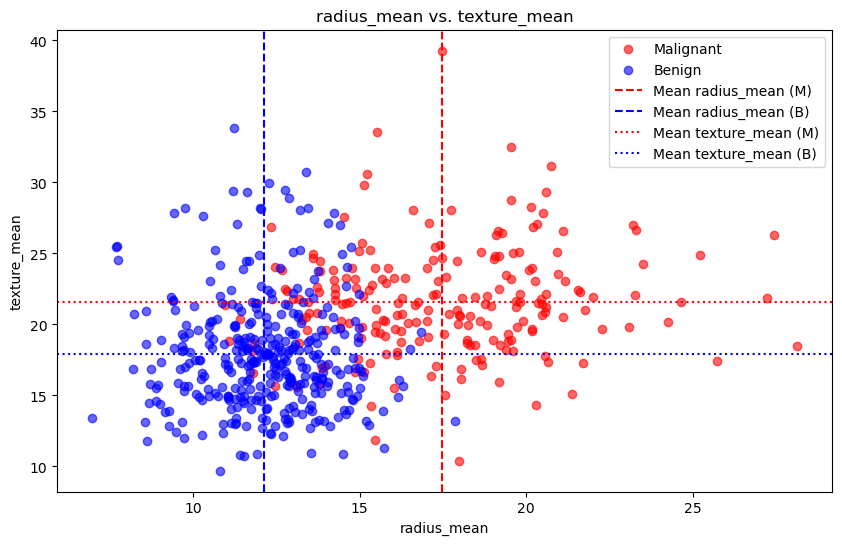

In [23]:
data_m = df[df['diagnosis'] == 'M']
data_b = df[df['diagnosis'] == 'B']

# Fucntion to print a histogram of 2 parameters
def plot_hist(df, param1, param2):

    df_m, df_b = df[df['diagnosis'] == 'M'], df[df['diagnosis'] == 'B']

    # Check parameters validity
    if param1 not in df.columns or param2 not in df.columns:
        print("Error, one of the parameter is not valid")
        return

    # Make a scatter plot 
    plt.figure(figsize=(10, 6))
    plt.scatter(df_m[param1], df_m[param2], color='red', label='Malignant', alpha=0.6)
    plt.scatter(df_b[param1], df_b[param2], color='blue', label='Benign', alpha=0.6)

    # Add means lines
    plt.axvline(df_m[param1].mean(), color='red', linestyle='--', label=f'Mean {param1} (M)')
    plt.axvline(df_b[param1].mean(), color='blue', linestyle='--', label=f'Mean {param1} (B)')
    plt.axhline(df_m[param2].mean(), color='red', linestyle=':', label=f'Mean {param2} (M)')
    plt.axhline(df_b[param2].mean(), color='blue', linestyle=':', label=f'Mean {param2} (B)')

    # Add titles and labels
    plt.title(f'{param1} vs. {param2}')
    plt.xlabel(f'{param1}')
    plt.ylabel(f'{param2}')
    plt.legend()
    plt.show()

# Example

plot_hist(df, 'radius_mean', 'texture_mean')

As anticipated from a biological standpoint, the analysis reveals a strong correlation between radius mean and a malignant cancer diagnosis. This aligns with the well-documented tendency of malignant cells to exhibit uncontrolled growth, a hallmark of cancer progression due to the loss of sensitivity to regulatory metabolic pathways.  

Additionally, a weaker yet noticeable correlation emerges between texture and diagnostic outcomes. Further probabilistic analysis is requireneeded to validate these preliminary findings and assess their significance.

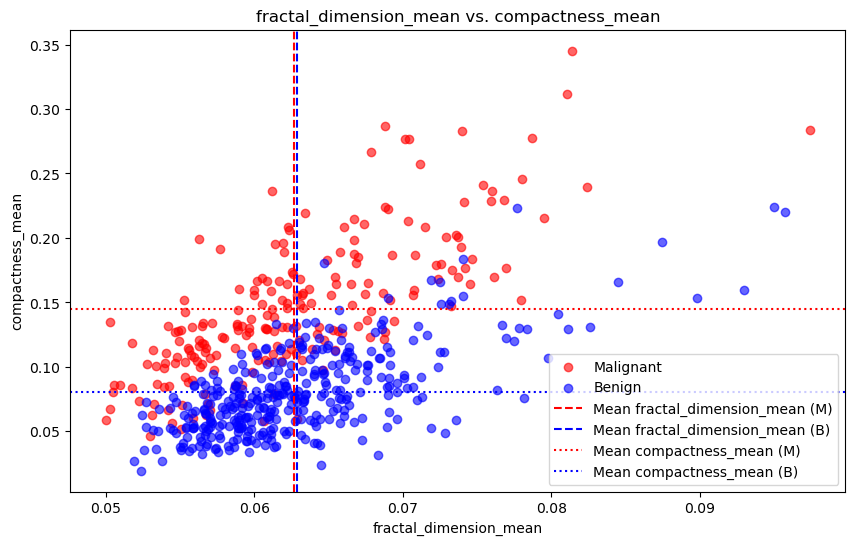

In [24]:
# histogram of fractal dimension and compactness
plot_hist(df, 'fractal_dimension_mean', 'compactness_mean')

The second plot suggests that compactness may serve as a discriminative feature for diagnosis, given the visible separation between malignant and benign cases. However, the fractal dimension seems to offer limited diagnostic value on its own, as its distribution overlaps significantly between the two groups.

Note that this 2D plot is not inherently special, it could be a single dimension, or more than 2 (plotting x distinct features). We chose this 2D visualization for its simplicity and superior readability.


##### 2.2.3 - Preprocessing and Standardisation

In [25]:
df_numeric = df.drop(columns=['id', 'diagnosis'])
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
y = df['diagnosis'] # Ensure 1 is Malignant, 0 is Benign

# 3 - Finding Relevant Features

Finding the most decisive parameters allows to develop lighter and easier to understand clinical products.

## 3.1 - Features Correlation Matrix

The features Correlation Matrix will help us identify highly correlated features whiwh may introduce redundancy.  
Irrelevant and redundant features can degrade the performances of a machine learning algorithm by making it unstable or bringing a risk of unstability.

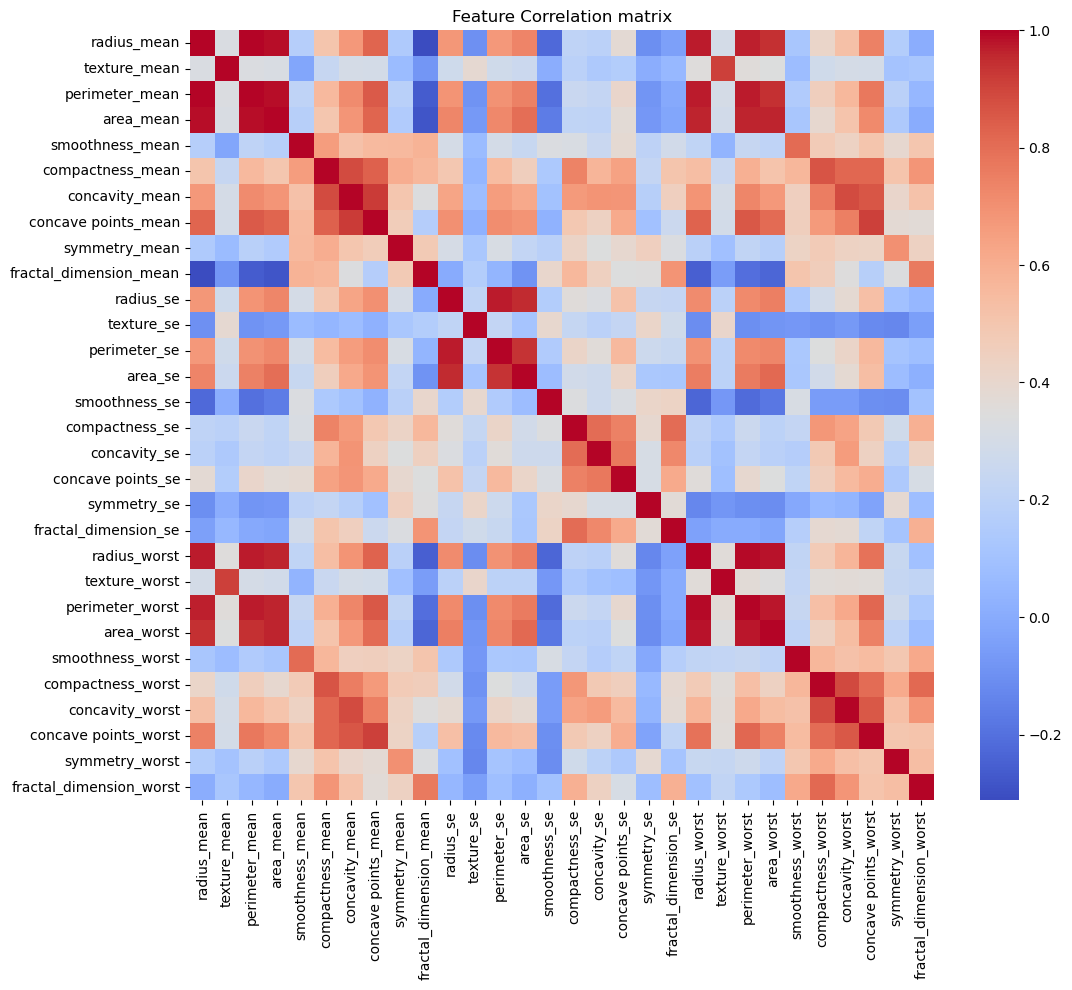

In [ ]:
# Let's study correlation between features and visualize it using a heatmap
corr_matrix = X_scaled.corr().abs()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation matrix')
plt.show()

As expected, some features are **highly correlated** (the pairs which intersection is represented as a deep red), for instance area and radius are highly correlated which should not come as a surprise.   
The issue with such correlated pairs, as said earlier, is that they can make the **model unstable** and can also lead to **overfitting** (poor generalisation over unseen data).  
To prevent this degradation, we will remove of of the two redundant values.

In [27]:
# Identify highly correlated values and remove them
threshold = 0.9
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
print(f"Highly correlated features :\n (correlation > {threshold}) : {to_drop}\n")
df_reduced = df_numeric.drop(columns=to_drop)
print(f"\nDataset shape after removing highly correlated features : {df_reduced.shape}\n")
print("Remaining features :")
print(df_reduced.columns.tolist())

Highly correlated features :
 (correlation > 0.9) : ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


Dataset shape after removing highly correlated features : (569, 20)

Remaining features :
['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


## 3.2 - PCA

We will now perform a **Principal Component Analysis (PCA)** to identify the **most informative axes in the feature space** that capture the greatest variance in the data.  
To ensure accurate results, we first normalize the features. Without normalization, a feature measured in nanometers could artificially dominate over the same feature measured in meters, only due to scale differences. Normalization eliminates this bias.

Normalisation : Y = $\frac{X - \bar{X}}{sd}$ _where $\bar{X}$ is the mean of the random variable X and sd it's standard deviation_

   radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   concavity_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0          0.3001         0.2419                 0.07871     1.0950   
1          0.0869         0.1812                 0.05667     0.5435   
2          0.1974         0.2069                 0.05999     0.7456   
3          0.2414         0.2597                 0.09744     0.4956   
4          0.1980         0.1809                 0.05883     0.7572   

   texture_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0      0.9053       0.006399         0.04904       0.05373            0.01587   
1      0

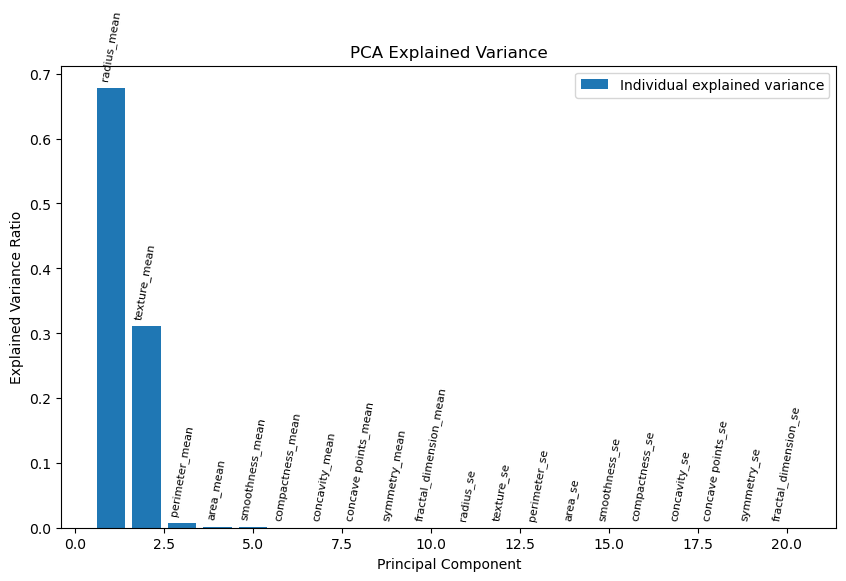

In [28]:
# Normalization of the data
print(df_reduced.head())

df_normalized = (df_reduced - df_reduced.mean()) / df_reduced.std()

eigenvalues, eigenvectors = np.linalg.eig(df_reduced.cov())

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Explained variance
explained_variance = eigenvalues / np.sum(eigenvalues)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, align='center', label='Individual explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
# Add the name of the features
for i in range(len(explained_variance)):
    plt.text(i + 1, explained_variance[i] + 0.01, df_numeric.columns[i], rotation=80, ha='center', va='bottom', fontsize=8)

plt.legend()
plt.show()